In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['svg.fonttype'] = 'none'

In [4]:
ale_df = pd.read_csv("../Data/Growth_data/evolved-isolate-growth-data/Evolved_isolates_data_frame.tsv", sep="\t")

In [5]:
recon_df = pd.read_csv("../Data/Growth_data/Reconstructions/Reconstruction_replicate_growth.csv", index_col=0)

comp_list = ["HMDA", "PUTR", "12PD", "23BD", "GLUT", "ADIP", "HEXA", "OCTA", "IBUA", "COUM", "BUT"]
for comp in comp_list:
    recon_df = recon_df[~recon_df["strain"].str.startswith(comp)]
    
recon_df["replicate"] = recon_df["strain"]
recon_df["strain"] = recon_df["replicate"].map(lambda x: x[:-2])

In [6]:
def prettify(s):
    if s == s.upper():
        return s
    else:
        return s.capitalize()

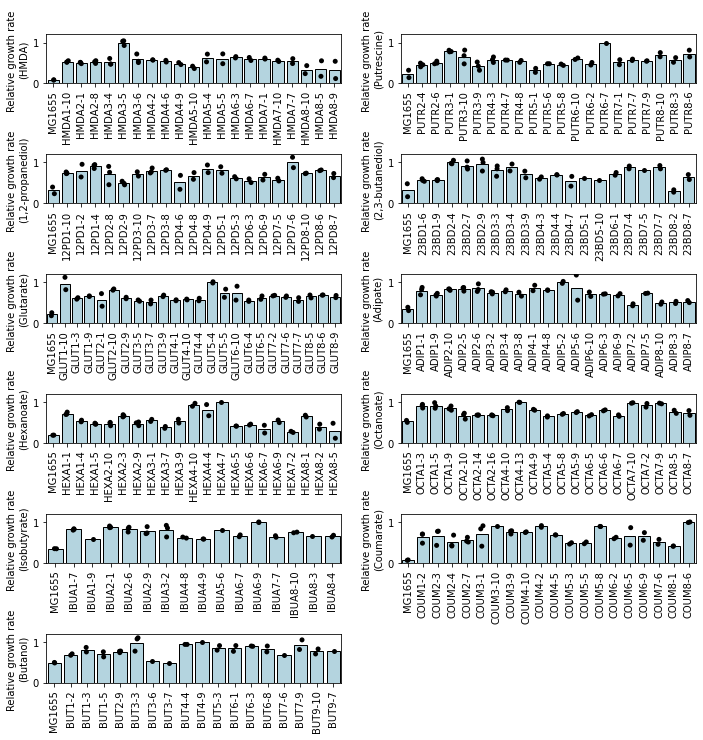

In [7]:
comp_order = [
    "HMDA", "putrescine", "1,2-propanediol", "2,3-butanediol", "glutarate", "adipate",
    "hexanoate", "octanoate", "isobutyrate", "coumarate", "butanol"
]


plt.figure(figsize=[10, 10])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = ale_df[ale_df["compound"] == comp]
    comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])
    
    #Normalize growth rates by the max
    comp_df['growth_rate']=comp_df['growth_rate']/comp_df[['growth_rate','strain']].groupby('strain').mean().max().values[0]
    
    sbn.barplot(x="strain", y="growth_rate", data=comp_df, errwidth=0, color="lightblue", edgecolor="black")
    plt.ylim(0,1.2)
    plt.xticks(rotation=90)
    sbn.stripplot(x="strain", y="growth_rate", data=comp_df, color="black")
    plt.xlabel("")
    plt.ylabel("Relative growth rate \n({})".format(prettify(comp)))

plt.tight_layout()
#plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 5 - Evolved tolerance.svg")

In [10]:
for i, comp in enumerate(comp_order):
    print (i, comp)

0 HMDA
1 putrescine
2 1,2-propanediol
3 2,3-butanediol
4 glutarate
5 adipate
6 hexanoate
7 octanoate
8 isobutyrate
9 coumarate
10 butanol


In [53]:
cnt_all = 0 # count the total analyzed cell number
cnt_cond = 0 # count the condition where 
cnt = 0  #count isolates whose growth rates were lower than that of MG1655
for i in comp_order:
    temp_df = ale_df[ale_df.compound==i]
    
    temp_df2 = temp_df.groupby(['strain']).mean()
    cnt = cnt + temp_df2[temp_df2.growth_rate< temp_df2.loc['MG1655','growth_rate']].index.size
    print(i, 
          temp_df2[temp_df2.growth_rate< temp_df2.loc['MG1655','growth_rate']].index.size,
         temp_df2.index.size
         )
    
    if ( temp_df2[temp_df2.growth_rate< temp_df2.loc['MG1655','growth_rate']].index.size == (temp_df2.index.size)):
        cnt_cond = cnt_cond+1
    cnt_all = cnt_all + temp_df2.index.size -1   

HMDA 0 21
putrescine 0 21
1,2-propanediol 0 21
2,3-butanediol 4 21
glutarate 0 24
adipate 0 21
hexanoate 0 21
octanoate 0 21
isobutyrate 7 21
coumarate 1 21
butanol 9 21


In [57]:
temp_df2

,growth_rate,repl
strain,,
BUT1-2,0.417908,2.0
BUT1-3,0.490007,2.0
BUT1-5,0.420843,2.0
BUT2-9,0.690973,2.0
BUT3-3,0.891731,2.0
BUT3-6,0.160001,2.0
BUT3-7,0.222405,1.5
BUT4-4,0.851824,1.5
BUT4-7,0.000000,1.5


In [ ]:
c

In [56]:
cnt_all-cnt

202

223

In [13]:
temp_df= ale_df[ale_df.compound==comp]

In [24]:
temp_df2 = temp_df.groupby(['strain']).mean()

In [32]:
temp_df2.index.size

21

In [30]:
temp_df2[temp_df2.growth_rate< temp_df2.loc['MG1655','growth_rate']]

,growth_rate,repl
strain,,
BUT1-2,0.417908,2.0
BUT1-5,0.420843,2.0
BUT3-6,0.160001,2.0
BUT3-7,0.222405,1.5
BUT4-7,0.000000,1.5
BUT5-2,0.000000,1.5
BUT7-6,0.309956,1.5
BUT7-7,0.000000,1.5
BUT9-7,0.351033,1.5


In [ ]:
comp_df = ale_df[ale_df["compound"] == comp]

In [9]:
comp_df

,strain,compound,slope,replicate
812,MG1655,butanol,0.461245,MG1655-1
832,MG1655,butanol,0.456863,MG1655-2
851,MG1655,butanol,0.449820,MG1655-3
856,cspC,butanol,0.475797,cspC-2
816,cspC,butanol,0.476992,cspC-3
837,cspC,butanol,0.457811,cspC-1
847,marC,butanol,0.396757,marC-3
843,marC,butanol,0.390433,marC-2
830,marC,butanol,0.408442,marC-1
852,marC_rob,butanol,0.431295,marC_rob-2


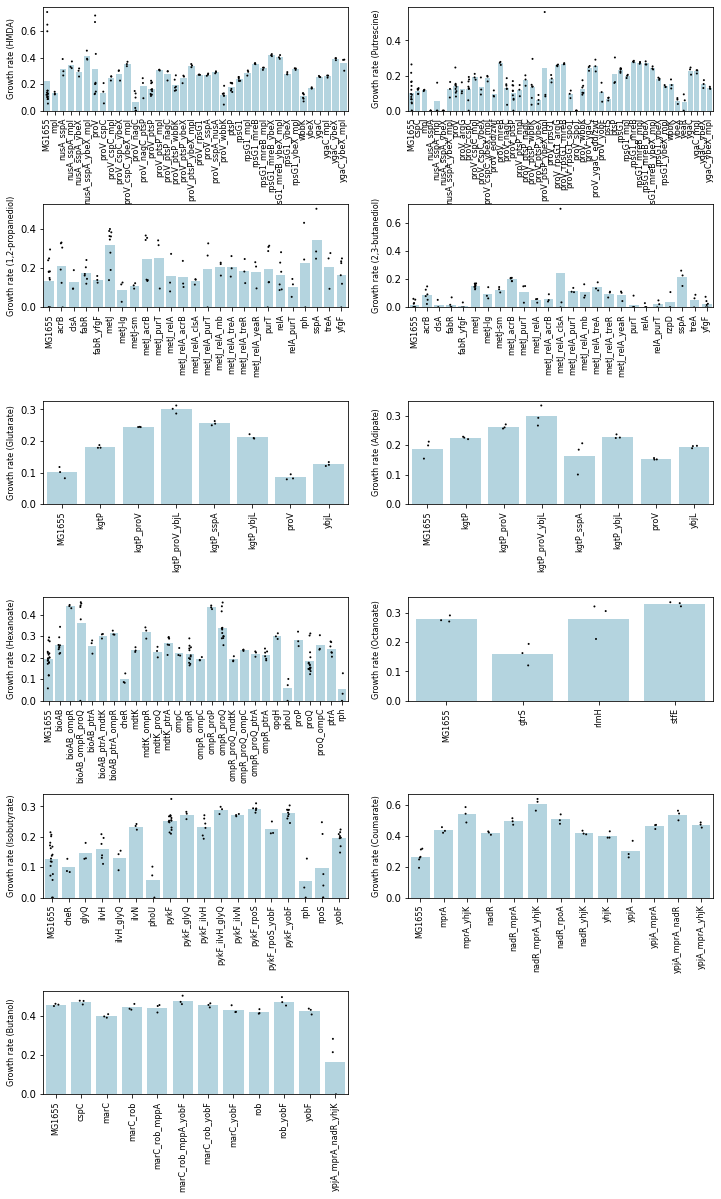

In [8]:
plt.figure(figsize=[12, 20])

for i, comp in enumerate(comp_order):
    plt.subplot(6, 2, (i % 12)+1)
    comp_df = recon_df[recon_df["compound"] == comp]
    # comp_df = comp_df[comp_df["growth_rate"] != 0]
    comp_df = pd.concat([
        comp_df[comp_df["strain"] == "MG1655"],
        comp_df[comp_df["strain"] != "MG1655"].sort_values("strain")
    ])

    sbn.barplot(x="strain", y="slope", data=comp_df, errwidth=0, color="lightblue")
    plt.xticks(rotation=90, fontsize=8)
    sbn.stripplot(x="strain", y="slope", data=comp_df, color="black", size=2)
    plt.xlabel("")
    plt.ylabel("Growth rate ({})".format(prettify(comp)), fontsize=8)
    plt.yticks(fontsize=10)

    
plt.subplots_adjust(hspace=0.9)
# plt.tight_layout()
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.pdf")
plt.savefig("../Plots/Supplementary Figure 6 - Reconstructed tolerance.svg")